In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Airbnb_Open_Data.csv')

/var/folders/r_/0qjppdg92195yxf0gny3r2_40000gn/T/ipykernel_87070/2116648692.py:4: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Airbnb_Open_Data.csv')


In [23]:
%config InlineBackend.figure_format = 'retina'

In [24]:
#DROPPING DUPLICATE ROWS
print('Before dropping duplicates:', df.shape)
df = df.drop_duplicates()
print('After dropping the duplicates:', df.shape)

Before dropping duplicates: (102599, 26)
After dropping the duplicates: (102058, 26)


In [25]:
#DROPPING COLUMNS : country, country code, license, host name, host id 
df = df.drop(['country','country code','license','host name'], axis=1)

#COLUMN : id

#Changing the type as category
df['id'] = df['id'].astype('category')

#COLUMN : Host Identity Verified

#Changing the type as category
df['host_identity_verified'] = df['host_identity_verified'].astype('category')

# df['host_identity_verified'].value_counts()

#COLUMN : Neighbourhood Group

#Merging the misspellings: manhatan and brookln
df['neighbourhood group'] = df['neighbourhood group'].replace('manhatan','Manhattan')
df['neighbourhood group'] = df['neighbourhood group'].replace('brookln','Brooklyn')

#Changing the type as category
df['neighbourhood group'] = df['neighbourhood group'].astype('category')

#COLUMN : Neighbourhood

#Changing the type as category
df['neighbourhood'] = df['neighbourhood'].astype('category')


In [26]:
#COLUMNS : lat and long

#Imputting missing values with the mean lat long of their neighborhoods

#Manhattan East Village
manhattan_eastvillage = df[(df['neighbourhood group'] == 'Manhattan') & (df['neighbourhood'] == 'East Village')]
df.loc[(df['lat'].isna()) & (df['id'] == '1442624'), 'lat'] = manhattan_eastvillage['lat'].mean()
df.loc[(df['long'].isna()) & (df['id'] == '1442624'), 'long'] = manhattan_eastvillage['long'].mean()

#Manhattan West Village
manhattan_westvillage = df[(df['neighbourhood group'] == 'Manhattan') & (df['neighbourhood'] == 'West Village')]
df.loc[(df['lat'].isna()) & (df['id'] == '1450908'), 'lat'] = manhattan_westvillage['lat'].mean()
df.loc[(df['long'].isna()) & (df['id'] == '1450908'), 'long'] = manhattan_westvillage['long'].mean()

#Manhattan Flatiron District
manhattan_flatiron = df[(df['neighbourhood group'] == 'Manhattan') & (df['neighbourhood'] == 'Flatiron District')]
df.loc[(df['lat'].isna()) & (df['id'] == '1512766'), 'lat'] = manhattan_flatiron['lat'].mean()
df.loc[(df['long'].isna()) & (df['id'] == '1512766'), 'long'] = manhattan_flatiron['long'].mean()

#Manhattan Upper West Side
manhattan_upperwest = df[(df['neighbourhood group'] == 'Manhattan') & (df['neighbourhood'] == 'Upper West Side')]
df.loc[(df['lat'].isna()) & (df['id'] == '1545904'), 'lat'] = manhattan_upperwest['lat'].mean()
df.loc[(df['long'].isna()) & (df['id'] == '1545904'), 'long'] = manhattan_upperwest['long'].mean()


#Brooklyn Crown Heights
brooklyn_crown = df[(df['neighbourhood group'] == 'Brooklyn') & (df['neighbourhood'] == 'Crown Heights')]
df.loc[(df['lat'].isna()) & (df['id'] == '1431578'), 'lat'] = brooklyn_crown['lat'].mean()
df.loc[(df['long'].isna()) & (df['id'] == '1431578'), 'long'] = brooklyn_crown['long'].mean()

#Brooklyn GreenPoint
brooklyn_green = df[(df['neighbourhood group'] == 'Brooklyn') & (df['neighbourhood'] == 'Greenpoint')]
df.loc[(df['lat'].isna()) & (df['id'] == '1434892'), 'lat'] = brooklyn_green['lat'].mean()
df.loc[(df['long'].isna()) & (df['id'] == '1434892'), 'long'] = brooklyn_green['long'].mean()
df.loc[(df['lat'].isna()) & (df['id'] == '1490122'), 'lat'] = brooklyn_green['lat'].mean()
df.loc[(df['long'].isna()) & (df['id'] == '1490122'), 'long'] = brooklyn_green['long'].mean()

#Queens Elmhurst
queens_elm = df[(df['neighbourhood group'] == 'Queens') & (df['neighbourhood'] == 'Elmhurst')]
df.loc[(df['lat'].isna()) & (df['id'] == '1434892'), 'lat'] = queens_elm['lat'].mean()
df.loc[(df['long'].isna()) & (df['id'] == '1434892'), 'long'] = queens_elm['long'].mean()


In [27]:
#COLUMN : Instant Bookable

#Changing the type as category
df['instant_bookable'] = df['instant_bookable'].astype('category')

#Mapping the true,false
TF_dict = {True: '1', False: '0'}
df['instant_bookable'] = df['instant_bookable'].map(TF_dict)

#COLUMN : Cancellation Policy

#Changing the type as category
df['cancellation_policy'] = df['cancellation_policy'].astype('category')

#COLUMN : Cancellation Policy

#Changing the type as category
df['cancellation_policy'] = df['cancellation_policy'].astype('category')

#COLUMN : Room Type

#Changing the type as category
df['room type'] = df['room type'].astype('category')

#COLUMN : Construction year -> New Column Created: Building Age

#Changing the type as category
df['Construction year'] = df['Construction year'].astype('category')

#COLUMN : Building_Age

#Sourcing the column from Construction Year
df['Building_Age'] = df['Construction year']

#Mapping the true,false
Year_dict = {2022: 1, 2021: 2,2020: 3,2019: 4,2018: 5,2017: 6,2016: 7,2015: 8,2014: 9,2013: 10,2012: 11,2011: 12,2010: 13,2009: 14,2008: 15,2007: 16,2006: 17,2005: 18, 2004: 19,2003: 20}
df['Building_Age'] = df['Building_Age'].map(Year_dict)

#COLUMN : Price

#Removing the non-numeric characters
df['price'] = pd.to_numeric(df['price'].replace(r'\D','',regex=True))

#Replaces the missing value with the average price
df['price'] = df['price'].fillna(df['price'].mean())

#COLUMN : Service Fee

#Removing the non-numeric characters
df['service fee'] = pd.to_numeric(df['price'].replace(r'\D','',regex=True))

#Replaces the missing value with the average price
df['service fee'] = df['service fee'].fillna(df['service fee'].mean())

#COLUMN : Minimum Nights

#Filtered minimum nights which are below 1 and more than 90 to eliminate the outliers
df = df[(df['minimum nights'] >= 1) & (df['minimum nights'] <= 90)]

#COLUMN : Number of Reviews

#Filled the missing values with the median of the number of reviews.
df['number of reviews'] = df['number of reviews'].fillna(df['number of reviews'].median())

#COLUMN : Last Review

#Changing the type as datetime
df['last review'] = pd.to_datetime(df['last review'],format= '%m/%d/%Y',errors='coerce')

#COLUMN : Review Rate Number

#Filled the missing values with the median value.
df['review rate number'] = df['review rate number'].fillna(df['review rate number'].median())

#COLUMN : Calculated Host Listings Count

#Filled the missing values with the median of the unique values
unique_host_listings = pd.Series(df['calculated host listings count'].unique())
df['calculated host listings count'] = df['calculated host listings count'].fillna(unique_host_listings.median())

#COLUMN : House Rules

#Changing the type as category
df['house_rules'] = df['house_rules'].astype('category')

In [28]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101221 entries, 0 to 102057
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              101221 non-null  category      
 1   NAME                            100980 non-null  object        
 2   host id                         101221 non-null  int64         
 3   host_identity_verified          100949 non-null  category      
 4   neighbourhood group             101194 non-null  category      
 5   neighbourhood                   101207 non-null  category      
 6   lat                             101213 non-null  float64       
 7   long                            101213 non-null  float64       
 8   instant_bookable                101125 non-null  category      
 9   cancellation_policy             101146 non-null  category      
 10  room type                       101221 non-null  categor

In [29]:
n_reviews = df.groupby(
    ['neighbourhood group', 'neighbourhood']
).mean(numeric_only=True)['number of reviews'].to_frame().reset_index()

In [30]:
# neighbourhood group number of reviews
n_reviews_group = n_reviews.groupby('neighbourhood group').mean(numeric_only=True).reset_index()
n_reviews_group

bronx_reviews = n_reviews_group.loc[0, 'number of reviews']
brooklyn_reviews = n_reviews_group.loc[1,'number of reviews']
manhattan_reviews = n_reviews_group.loc[2,'number of reviews']
queens_reviews = n_reviews_group.loc[3,'number of reviews']
staten_reviews = n_reviews_group.loc[4,'number of reviews']

print(f'Bronx average number of reviews is {bronx_reviews:.4f}')
print(f'Brooklyn average number of reviews is {brooklyn_reviews:.4f}')
print(f'Manhattan average number of reviews is {manhattan_reviews:.4f}')
print(f'Queens average number of reviews is {queens_reviews:.4f}')
print(f'Staten Island average number of reviews is {staten_reviews:.4f}')

Bronx average number of reviews is 29.8781
Brooklyn average number of reviews is 29.5000
Manhattan average number of reviews is 21.6074
Queens average number of reviews is 29.9973
Staten Island average number of reviews is 31.6446


In [31]:
# Bronx top 5 frequent neighbourhood
bronx_freq = df[df['neighbourhood group'] == 'Bronx']['neighbourhood'].value_counts()
nh_bronx = list(bronx_freq[:5].index)
n_reviews_Bronx = n_reviews[n_reviews['neighbourhood group'] == 'Bronx'][['neighbourhood','number of reviews']].dropna()
n_reviews_Bronx = n_reviews_Bronx.query('neighbourhood in @nh_bronx')

# Brooklyn top 5 
brook_freq = df[df['neighbourhood group'] == 'Brooklyn']['neighbourhood'].value_counts()
nh_brook = list(brook_freq[:5].index)
n_reviews_Brooklyn = n_reviews[n_reviews['neighbourhood group'] == 'Brooklyn'][['neighbourhood','number of reviews']].dropna()
n_reviews_Brooklyn = n_reviews_Brooklyn.query('neighbourhood in @nh_brook')


# Manhattan top 5
man_freq = df[df['neighbourhood group'] == 'Manhattan']['neighbourhood'].value_counts()
nh_man = list(man_freq[:5].index)
n_reviews_Manhattan = n_reviews[n_reviews['neighbourhood group'] == 'Manhattan'][['neighbourhood','number of reviews']].dropna()
n_reviews_Manhattan = n_reviews_Manhattan.query('neighbourhood in @nh_man')

# Queens top 5
queens_freq = df[df['neighbourhood group'] == 'Queens']['neighbourhood'].value_counts()
nh_queens = list(queens_freq[:5].index)
n_reviews_Queens = n_reviews[n_reviews['neighbourhood group'] == 'Queens'][['neighbourhood','number of reviews']].dropna()
n_reviews_Queens = n_reviews_Queens.query('neighbourhood in @nh_queens')

# Staten Island top 5
staten_freq = df[df['neighbourhood group'] == 'Staten Island']['neighbourhood'].value_counts()
nh_staten = list(staten_freq[:5].index)
n_reviews_Staten = n_reviews[n_reviews['neighbourhood group'] == 'Staten Island'][['neighbourhood','number of reviews']].dropna()
n_reviews_Staten = n_reviews_Staten.query('neighbourhood in @nh_staten')


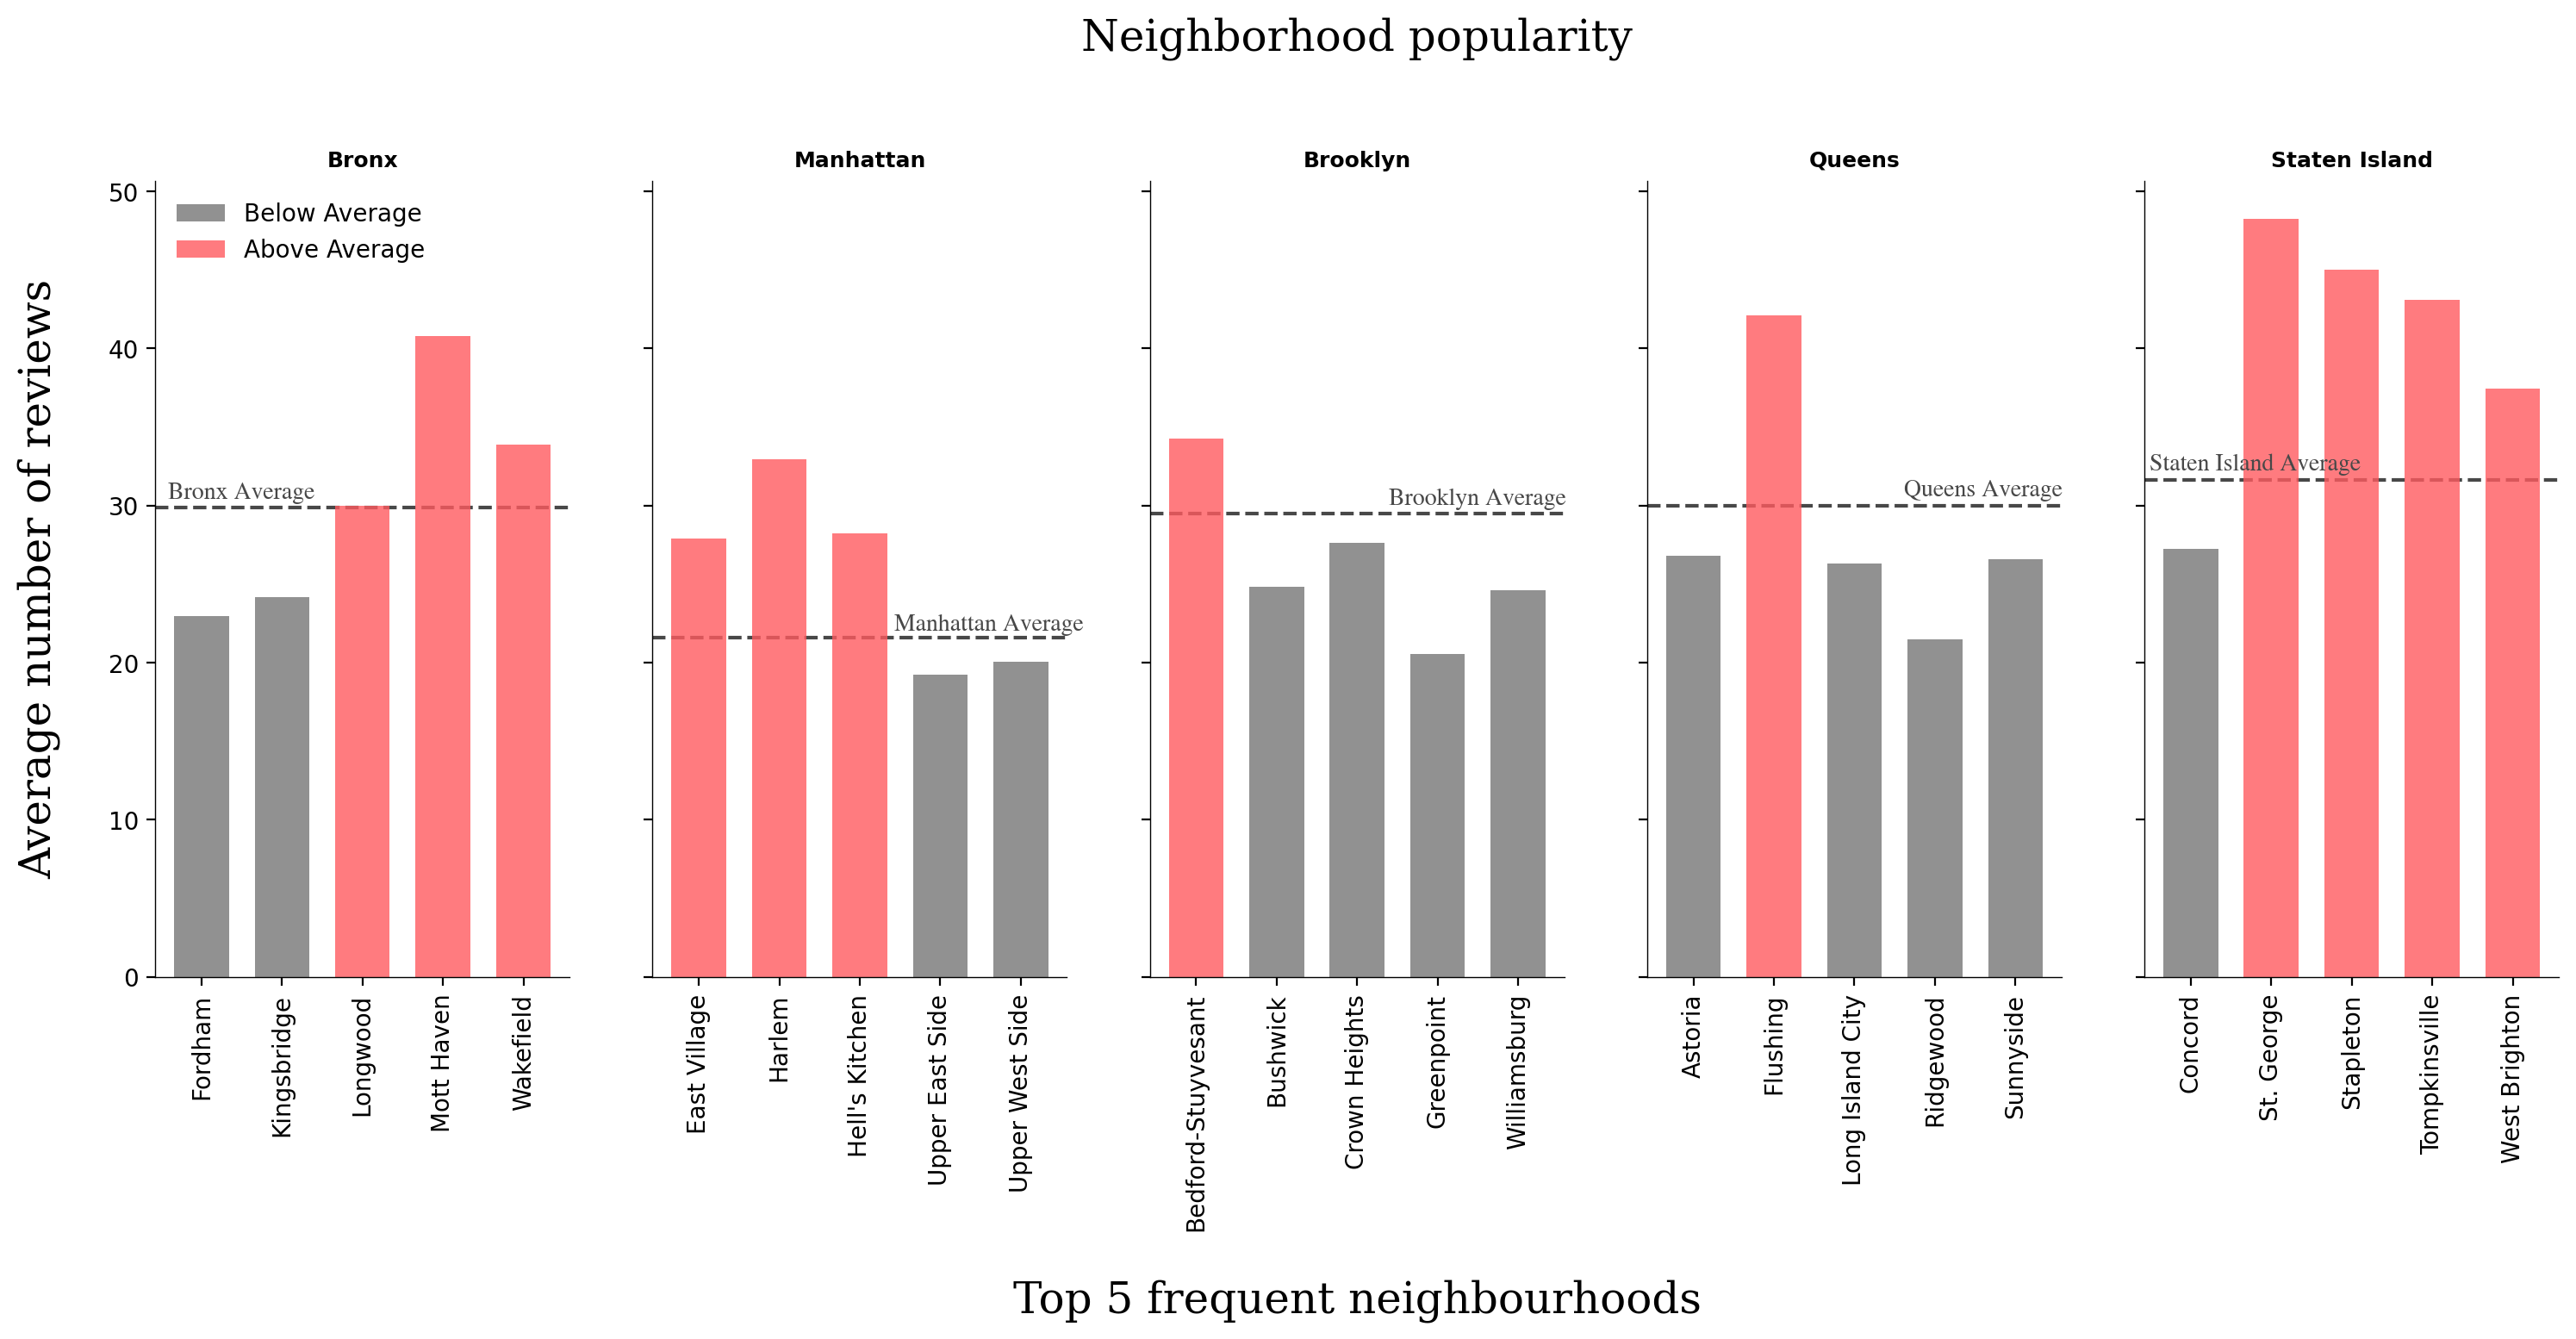

In [32]:
location_dict = {
    'Bronx':n_reviews_Bronx,
    'Manhattan':n_reviews_Manhattan,
    'Brooklyn':n_reviews_Brooklyn,
    'Queens':n_reviews_Queens,
    'Staten Island':n_reviews_Staten,
}

average_dict = {
    'Bronx':bronx_reviews,
    'Manhattan':manhattan_reviews,
    'Brooklyn':brooklyn_reviews,
    'Queens':queens_reviews,
    'Staten Island':staten_reviews,
}

label_dict = {
    'Bronx':0.5,
    'Manhattan':3.6,
    'Brooklyn':3.5,
    'Queens':3.6,
    'Staten Island':0.8,
}

below_average_color = '#767676'
above_average_color = '#FF5A5F'

fig,axes = plt.subplots(nrows=1, ncols=5, figsize=(18,6), sharey=True)

for t, town in enumerate(list(location_dict.keys())):

    town_name = town
    x_town = location_dict[town]['neighbourhood']
    y_town = location_dict[town]['number of reviews']

    avg_num_reviews = average_dict[town]
    colors = []
    for y in y_town:
        if y > avg_num_reviews:
            colors.append(above_average_color)
        else:
            colors.append(below_average_color)

    plt.subplot(151+t)
    plt.title(town_name)

    ax = plt.gca()
    town_bar = ax.bar(x_town, y_town, color=colors, width=0.68, label=['Below Average', None, 'Above Average', None, None], alpha=0.8)


    ax.set_title(town_name, fontsize=9, weight="bold")
    ax.set_xticks(np.arange(5))
    ax.set_xticklabels([n for n in x_town], rotation=90)
    ax.spines['top'].set_visible(False) 
    ax.spines['right'].set_visible(False) 
    ax.spines['left'].set_linewidth(.5) 
    ax.spines['bottom'].set_linewidth(.5) 
    ax.axhline(avg_num_reviews, c='#484848', ls='--',lw=1.5, zorder=-999)
    ax.text(label_dict[town], 1.02*avg_num_reviews, f'{town_name} Average', c='#484848', ha='center', font='Times')
    if town == 'Bronx':
        ax.set_ylabel('Average number of reviews', fontsize=18, fontname='serif', labelpad=20)
        ax.legend(frameon=False, loc='upper left')
    if town == 'Brooklyn':
        axes[2].text(2, 2*avg_num_reviews, "Neighborhood popularity", ha='center', font='serif', fontsize=18)
    if town == 'Brooklyn':
        axes[2].set_xlabel('Top 5 frequent neighbourhoods', fontsize=18, fontname='serif', labelpad=20)

plt.savefig("neighbourhood_popularity.png", bbox_inches='tight')
plt.show()
    

In [35]:
# Host types according to Airbnb official category

bins = [0, 1, 20, 100, 1000]
category = ['Individuals', 'Professional small property managers', 'Professional large property managers', 'Hotels']
df['host types'] = pd.cut(df['calculated host listings count'], bins, labels=category)
df['host types'].value_counts()


Individuals                             62591
Professional small property managers    32613
Professional large property managers     3980
Hotels                                   2037
Name: host types, dtype: int64

In [36]:
med_small = df[df['host types'] == 'Professional small property managers'].median(
    numeric_only=True)['calculated host listings count']
med_large = df[df['host types'] == 'Professional large property managers'].median(
    numeric_only=True)['calculated host listings count']
med_hotels = df[df['host types'] == 'Hotels'].median(
    numeric_only=True)['calculated host listings count']
print(med_small, med_large, med_hotels)

3.0 47.0 186.0


In [37]:
review_ind = df[df['host types'] == 'Individuals'].mean(
    numeric_only=True)['review rate number']
review_small = df[df['host types'] == 'Professional small property managers'].mean(
    numeric_only=True)['review rate number']
review_large = df[df['host types'] == 'Professional large property managers'].mean(
    numeric_only=True)['review rate number']
review_hotel = df[df['host types'] == 'Hotels'].mean(
    numeric_only=True)['review rate number']
print(review_ind, review_small, review_large, review_hotel)

3.2462654375229665 3.32533038972189 3.329396984924623 3.4678448699067257


In [38]:
n_review_ind = df[df['host types'] == 'Individuals'].mean(
    numeric_only=True)['number of reviews']
n_review_small = df[df['host types'] == 'Professional small property managers'].mean(
    numeric_only=True)['number of reviews']
n_review_large = df[df['host types'] == 'Professional large property managers'].mean(
    numeric_only=True)['number of reviews']
n_review_hotel = df[df['host types'] == 'Hotels'].mean(
    numeric_only=True)['review rate number']
print(n_review_ind, n_review_small, n_review_large, n_review_hotel)

24.67774919716892 36.60454420016558 7.7090452261306535 3.4678448699067257


In [55]:
hosts_counts = pd.DataFrame({
    'Host types': ['Individuals', 'Professional small property managers', 
                   'Professional large property managers', 'Hotels'],
    'Number of hosts': [int(62591), int(32613/3), int(3980/47), int(2037/186)],
    'Average number of reviews': [n_review_ind, n_review_small, n_review_large, n_review_hotel],
    'Average review rate': [review_ind, review_small, review_large, review_hotel]
    
})
hosts_counts

,Host types,Number of hosts,Average number of reviews,Average review rate
0,Individuals,62591,24.677749,3.246265
1,Professional small property managers,10871,36.604544,3.325330
2,Professional large property managers,84,7.709045,3.329397
3,Hotels,10,3.467845,3.467845


In [161]:
import seaborn as sns
import matplotlib.patches as mpatches

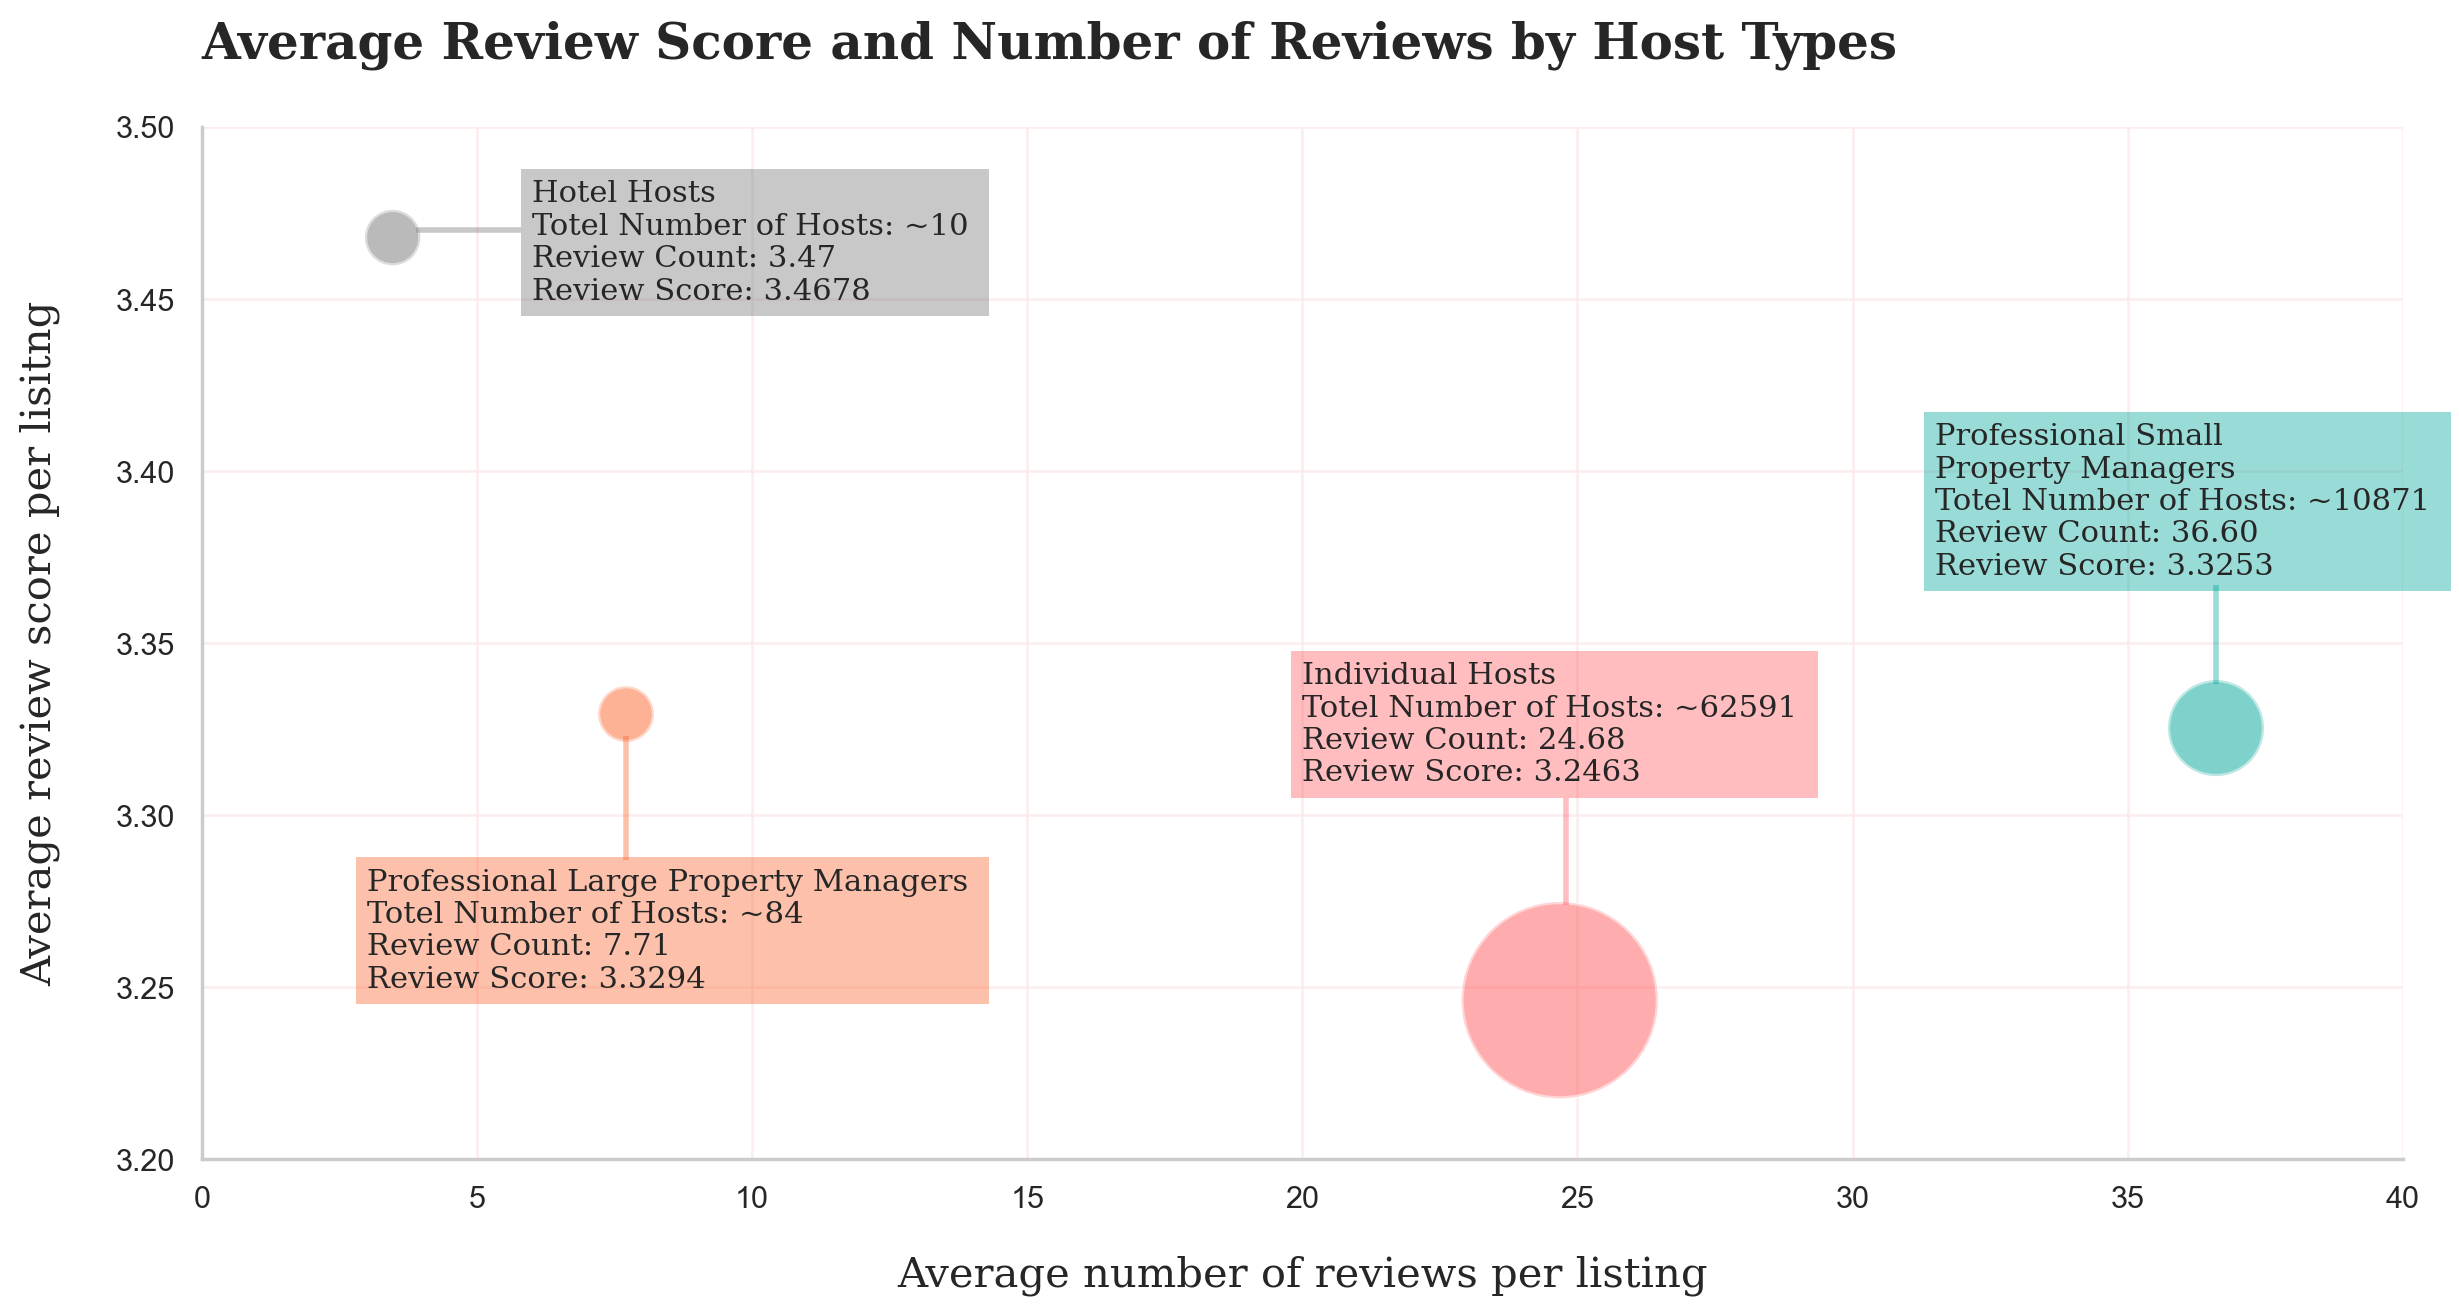

In [184]:
# sns.set_theme(style='whitegrid')

palette_host = ['#FF5A5F', '#00A699', '#FC642D', '#767676']
# fig, ax = plt.subplots()
# fig, ax = plt.subplots(figsize=(6,4))
plot = sns.relplot(data=hosts_counts, x='Average number of reviews', y='Average review rate',
            hue = 'Host types', size = 'Number of hosts', legend=False,
            sizes = (400,5000),alpha=.5, palette=palette_host, height=6, aspect=2)
plot.set(xlim = (0,40),ylim=(3.2, 3.5))
plt.xlabel('Average number of reviews per listing', fontname='serif', fontsize=15, labelpad=15)
plt.ylabel('Average review score per lisitng', fontname='serif', fontsize=15, labelpad=20)
plt.title('Average Review Score and Number of Reviews by Host Types', fontname='serif', size=18, loc='left', weight='bold', pad=25)

# Add boxes
# hotel
set1 = dict(facecolor='#767676', edgecolor='none', alpha=0.4)
plt.text(6, 3.45, f'Hotel Hosts \nTotel Number of Hosts: ~10 \nReview Count: {n_review_hotel:.2f} \nReview Score: {review_hotel:.4f}',
        fontsize=11,fontname='serif',bbox=set1)
plt.hlines(y=3.47, xmin=3.9, xmax=5.8, color='#767676', linewidth=2,alpha=0.4)

# large
set2 = dict(facecolor='#FC642D', edgecolor='none', alpha=0.4)
plt.text(3, 3.25, 
         f'Professional Large Property Managers \nTotel Number of Hosts: ~84 \nReview Count: {n_review_large:.2f} \nReview Score: {review_large:.4f}',
         fontsize=11,fontname='serif',bbox=set2)
plt.vlines(x=7.7, ymin=3.287, ymax=3.323, color='#FC642D', linewidth=2,alpha=0.4)

# individual
set3 = dict(facecolor='#FF5A5F', edgecolor='none', alpha=0.4)
plt.text(20, 3.31, 
         f'Individual Hosts \nTotel Number of Hosts: ~62591 \nReview Count: {n_review_ind:.2f} \nReview Score: {review_ind:.4f}',
         fontsize=11,fontname='serif',bbox=set3)
plt.vlines(x=24.8, ymin=3.274, ymax=3.305, color='#FF5A5F', linewidth=2,alpha=0.4)

# small
set4 = dict(facecolor='#00A699', edgecolor='none', alpha=0.4)
plt.text(31.5, 3.37, 
         f'Professional Small \nProperty Managers \nTotel Number of Hosts: ~10871 \nReview Count: {n_review_small:.2f} \nReview Score: {review_small:.4f}',
         fontsize=11,fontname='serif',bbox=set4)
plt.vlines(x=36.6, ymin=3.338, ymax=3.367, color='#00A699', linewidth=2,alpha=0.4)

plt.grid(color='#FBEAEB', alpha=0.8)
# ax.patch.set_facecolor('#FBEAEB')
# ax.patch.set_alpha(0.3)
plt.show()